#Hackathon - Second Quantum Computing School
##Group: QNat
Alberto Bezerra de Palhares Junior   
Joab Morais Varela  
Moisés da Rocha Alves  
Paulo Vitor de Queiroz Ferreira  
Tailan Santos Sarubi
#Introduction to Applications of Quantum Computing to Quantum Chemistry
##Challenge: $a$



#Task:
Implement a function in Pennylane that simulates the Variational Quantum
Eigensolver (VQE). This function should take as input a six-entry array of floating-point numbers, representing the x, y and z coordinates of two hydrogen atoms.



*   The function should return the ground state energy of the molecule.
*   Also explain why the Pauli-Z is necessary in Jordan-Wigner transformation.



##Step 0:
Firstly, we need to download and import the libraries we are going to use.

In [ ]:
!pip install pennylane -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 27.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.0/51.0 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.3/15.3 MB 27.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 23.4 MB/s eta 0:00:00


In [ ]:
#Autor: Joab Morais Varela

import pennylane as qml
from pennylane import numpy as pnp

##Step 1:
Loading the `symbols` and `coordinates` variables, and creating a function `molecule_fuc()` that returns the objects `molecule` , `H` (Hamiltonian), `num_qubits` (Number of qubits) and `hf` (hf aproximation).

In [ ]:
symbols = ["H", "H"]
coordinates = pnp.array([[0.0, 0.0, -0.6614], [0.0, 0.0, 0.6614]])

In [ ]:
#symbols = List containing the molecular symbols
#coordenates = List containing the position coordenates of each molecular element
#num_electrons = electrons number

def molecule_fuc(symbols, coordinates, num_electrons): #This function will return all the molecule proprieties

    molecule = qml.qchem.Molecule(symbols,coordinates, mult=1, charge=0)
    H, num_qubits = qml.qchem.molecular_hamiltonian(molecule)

    electrons = num_electrons #As we are talking about H, the number of eletrons is equal to the number os atoms
    orbitals = num_qubits

    hf = qml.qchem.hf_state(electrons,orbitals) #Doing the hf aproximation

    return molecule, num_qubits, H, hf

##Step 2:

Creating the variational circuit

In [ ]:
#param = Cost function initial value
#wires = Number of qubits that the circuit will accting above
#hf = Hartree-Fock initial state for the molecule
#exitation_wires = Qubits the will suffer the Double Exitation

def variational_circuit_VQE(param, wires, hf, exitation_wires): #Variational circuit

    qml.BasisState(hf,wires=wires)
    qml.DoubleExcitation(param, wires=exitation_wires)

##Step 3:

Loading variables, the cost function, and the optimizer.

In [ ]:
#Loading variables

molecule, num_qubits, H, hf = molecule_fuc(symbols, coordinates, len(symbols))
wires = range(num_qubits)
exitation_wires = range(num_qubits)

In [ ]:
print(f'Molecule caracteristcs:\n Basis: {molecule.basis_name}\n Charge: {molecule.charge}')

Molecule caracteristcs:
 Basis: sto-3g
 Charge: 0


(<Figure size 500x500 with 1 Axes>, <Axes: >)

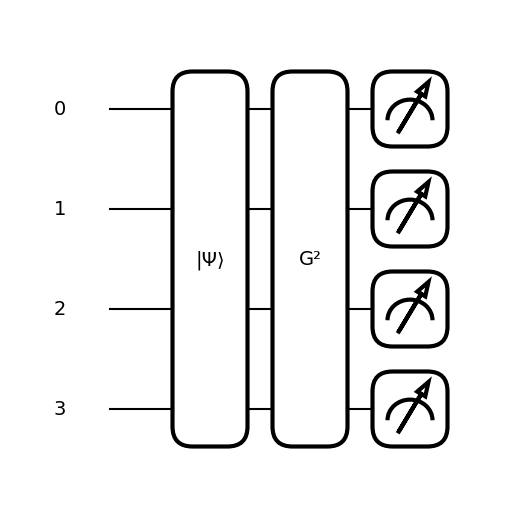

In [ ]:
#param = Cost function initial value
#wires = Number of qubits that the circuit will accting above
#hf = Hartree-Fock initial state for the molecule
#exitation_wires = Qubits the will suffer the Double Exitation

#Define device to use

dev = qml.device('default.qubit',wires=num_qubits)
#Create QNode associated with cost function

@qml.qnode(dev)
def cost_function(param):

    variational_circuit_VQE(param, wires, hf, exitation_wires)

    return qml.expval(H)

#Draw circuit

qml.draw_mpl(cost_function)(0.2)


In [ ]:
#stepsize = stepsize
#init_cost_value = Cost function initial value (param)
#max_iterations = max iteration number
#wires = Number of qubits that the circuit will accting above
#hf = Hartree-Fock initial state for the molecule
#exitation_wires = Qubits the will suffer the Double Exitation

def optmizer(stepsize, init_cost_value, max_iterations):

    opt = qml.GradientDescentOptimizer(stepsize= stepsize)


    #Choose an initial parameter for the variation circuit (angle of Givens rotation)

    theta = pnp.array(init_cost_value, requires_grad = True)

    # store the values of the cost function
    energy = [cost_function(theta)]

    # store the values of the circuit parameter
    angle = [theta]

    max_iterations = max_iterations
    conv_tol = 1e-06



    #Repetition of optimization until convergence
    for n in range(max_iterations):
        theta, prev_energy = opt.step_and_cost(cost_function, theta)

        energy.append(cost_function(theta))
        angle.append(theta)

        conv = pnp.abs(energy[-1] - prev_energy)

        if n %2==0:
            print(f'Step {n} ,  Energy = {energy[n]:.6f} Ha"')

        if conv <= conv_tol:
            break

    print("\n" f"Final value of the ground-state energy = {energy[-1]:.8f} Ha")
    print("\n" f"Optimal value of the circuit parameter = {angle[-1]:.4f}")


##Step 4:

Finally creating the VQE function that recives as argument the symbols and a list of 6 elements that represnts the coordinates. Returning the ground state energy of the molecule.

In [ ]:
def VQE(symbols, coordinates, stepsize = 0.4, init_cost_value = 0.2, max_iterations = 40): #By default 'num_electrons' uses the H configuration

    molecule, num_qubits, H, hf = molecule_fuc(symbols, coordinates, len(symbols))
    wires = range(num_qubits)
    exitation_wires = range(num_qubits)

    optmizer(stepsize, init_cost_value, max_iterations)

In [ ]:
VQE(symbols,coordinates)

Step 0 ,  Energy = -1.136148 Ha"
Step 2 ,  Energy = -1.136182 Ha"
Step 4 ,  Energy = -1.136188 Ha"

Final value of the ground-state energy = -1.13618856 Ha

Optimal value of the circuit parameter = 0.2085


Why the Pauli-Z is necessary in Jordan-Wigner transformation?

The Jordan-Wigner transformation maps fermionic operators into quantum computing operators using Pauli operators. The fermionic creation and annihilation operator, $a_i^{\dagger} = (\prod_{k=1}^{i-1} \sigma_z^{k}) \sigma_{+}^{i}$, and $a_i = (\prod_{k=1}^{i-1} \sigma_z^{k}) \sigma_{-}^{i}$ need to obey an anti-commutation relation:

$\{ a_i, a_j^{†}\} = \delta_{i,j}$.

The choice of using the product of $\sigma_z$'s in $a_i^{\dagger}$ and $a_j$ ensures that this relation is obeyed because

$(\sigma_z^{i})^2 = I$,  
$[\sigma_-^{i},\sigma_+^{j}] = 0$, for $i \neq j$,   
$\{\sigma_-^{i},\sigma_+^{j}\} = 1$, for $i = j$.   

When $i = j$, all $\sigma_j$ turn into identities, giving us $\sigma_-^i\sigma_+^i - \sigma_+^i\sigma_-^i = 1$.

When $i \neq j$, some $\sigma_z$ will remain. $\sigma_z$ and $\sigma_{\pm}$ have the following relations:

$\sigma_+^i\sigma_z^i = - \sigma_+^i$,   
$\sigma_z^i\sigma_+^i = \sigma_+^i$,  
$\sigma_-^i\sigma_z^i = \sigma_-^i$,  
$\sigma_z^i\sigma_-^i = - \sigma_-^i$.  

So, the adding factors of $-1$ with the permutation of $\sigma_z$ with $\sigma_{\pm}$ will result in $(\text{remaining } \sigma_z's)(\sigma_-^i\sigma_+^j + \sigma_+^j\sigma_-^i) = 0$. Thus, $\{ a_i, a_j^{†}\} = \delta_{i,j}$.